# Import des librairies 

In [22]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


importer la base de données 

In [23]:
dt = pd.read_csv('les-arbres.csv' , sep = ';', error_bad_lines = False )
dt.head()

b'Skipping line 1916: expected 17 fields, saw 18\n'


,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435"
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146"
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,NaN,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442"
3,241122.0,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE SARRETTE,000501003,Tilleul,Tilia,tomentosa,NaN,155.0,12.0,A,0.0,"48.8259993388, 2.32878574525"
4,99927.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DU RANELAGH,00030007,Erable,Acer,platanoides,'Schwedleri',125.0,0.0,NaN,NaN,"48.858836461, 2.26870442691"


# Primary exploration

In [24]:
dt.shape

(200332, 17)

In [25]:
dt.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')

In [26]:
dt.describe()

,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,2.003320e+05,0.0,200332.000000,200332.000000,137203.000000
mean,3.871040e+05,NaN,83.377988,13.108235,0.001341
std,5.454652e+05,NaN,672.864029,1970.258098,0.036596
min,9.987400e+04,NaN,0.000000,0.000000,0.000000
25%,1.558788e+05,NaN,30.000000,5.000000,0.000000
50%,2.210865e+05,NaN,70.000000,8.000000,0.000000
75%,2.741462e+05,NaN,115.000000,12.000000,0.000000
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000


# Detect outliers

Text(0.5,1,'circonference')

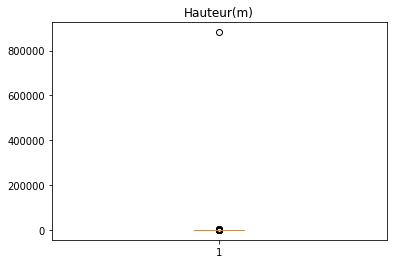

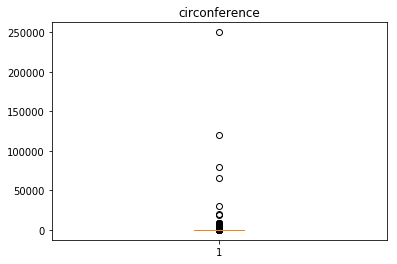

In [27]:
plt.boxplot(dt['HAUTEUR (m)'])
plt.title("Hauteur(m)")
figure = plt.figure()
plt.boxplot(dt['CIRCONFERENCEENCM'])
plt.title("circonference")



Suppression des valeurs aberrantes

In [29]:
condition = (dt['HAUTEUR (m)'] < 75)&(dt['CIRCONFERENCEENCM']<300)&(dt['HAUTEUR (m)'] >0)&(dt['CIRCONFERENCEENCM']>0)
dt=dt[condition]
dt.shape

(159435, 17)

Text(0.5,1,'circonference)')

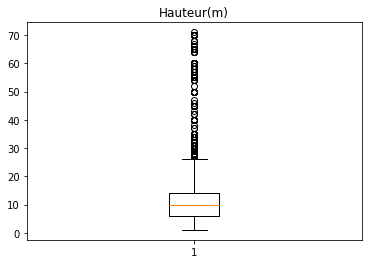

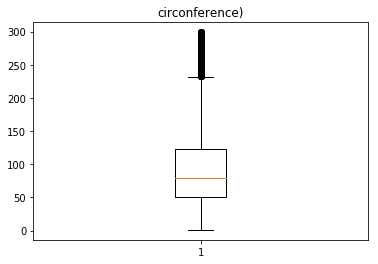

In [30]:
plt.boxplot(dt['HAUTEUR (m)'])
plt.title("Hauteur(m)")
figure = plt.figure()
plt.boxplot(dt['CIRCONFERENCEENCM'])
plt.title("circonference)")

# Description de quelques variables explicatives

In [31]:
dt['HAUTEUR (m)'].describe()

count    159435.000000
mean         10.349014
std           5.307635
min           1.000000
25%           6.000000
50%          10.000000
75%          14.000000
max          71.000000
Name: HAUTEUR (m), dtype: float64

In [32]:
dt['CIRCONFERENCEENCM'].describe()

count    159435.000000
mean         90.904983
std          55.357457
min           1.000000
25%          50.000000
50%          80.000000
75%         123.000000
max         299.000000
Name: CIRCONFERENCEENCM, dtype: float64

In [33]:
#Nombre d'arbres par domaine publique
dt['DOMANIALITE'].value_counts()

Alignement      99540
Jardin          26428
CIMETIERE       16918
DASCO            6373
PERIPHERIQUE     5152
DJS              3729
DFPE             1269
DAC                21
DASES               4
Name: DOMANIALITE, dtype: int64

In [15]:
#Nombre d'arbres par espèces 
dt['ESPECE'].value_counts()

x hispanica                  32825
hippocastanum                17631
japonica                     11617
n. sp.                        8814
tomentosa                     8702
pseudoplatanus                7071
platanoides                   6204
x europaea                    4684
nigra                         4620
x carnea                      4357
australis                     3998
cordata                       3831
excelsior                     3747
betulus                       3456
colurna                       3357
occidentalis                  3221
calleryana                    3124
platyphyllos                  2885
serrulata                     2389
pseudoacacia                  2223
orientalis                    1981
baccata                       1944
sylvatica                     1870
campestre                     1523
pendula                       1456
alba                          1195
nigra subsp. nigra            1193
robur                         1143
tulipifera          

In [34]:
condition=dt['ESPECE'].value_counts(dropna = False) 
l = condition[condition > 500]
l.keys()

Index([           'x hispanica',          'hippocastanum',
                     'japonica',              'tomentosa',
                       'n. sp.',            'platanoides',
               'pseudoplatanus',               'x carnea',
                   'x europaea',                  'nigra',
                    'australis',           'occidentalis',
                      'cordata',                'colurna',
                    'excelsior',             'calleryana',
                      'betulus',             'orientalis',
                 'pseudoacacia',           'platyphyllos',
                    'serrulata',                'baccata',
                            nan,              'campestre',
                         'alba',               'sinensis',
                    'sylvatica',                 'biloba',
                 'siliquastrum',                  'avium',
                   'cerasifera',                'pendula',
                        'robur',              'altissima

In [35]:
condition1 = dt['ESPECE'].isin(l.keys())
dt=dt[condition1]
dt['ESPECE'].value_counts()

x hispanica               33634
hippocastanum             17802
japonica                  10428
tomentosa                  8196
n. sp.                     8007
platanoides                4701
pseudoplatanus             4512
x carnea                   4065
x europaea                 3621
nigra                      3532
australis                  3309
occidentalis               3212
cordata                    3045
colurna                    2767
excelsior                  2540
calleryana                 2393
betulus                    2382
orientalis                 2025
pseudoacacia               1927
platyphyllos               1701
serrulata                  1440
baccata                    1321
campestre                  1142
alba                       1048
sinensis                    943
sylvatica                   805
biloba                      797
siliquastrum                784
avium                       776
cerasifera                  775
pendula                     762
robur   

# Visualiser la distribution des arbres par arrondissements

<BarContainer object of 25 artists>

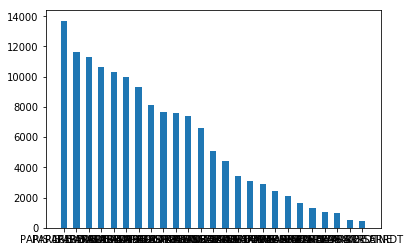

In [36]:
l=dt['ARRONDISSEMENT'].value_counts()
plt.bar(list(l.keys()),list(l), 0.5)

<BarContainer object of 20 artists>

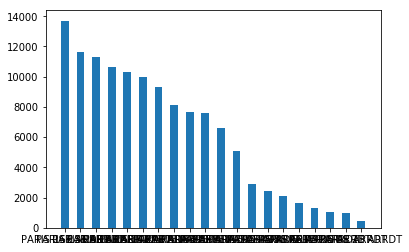

In [37]:
condition = dt.ARRONDISSEMENT.str.contains('PARIS')
l1=dt[condition].ARRONDISSEMENT.value_counts()
plt.bar(list(l1.keys()),list(l1), 0.5)


# analyser les arbres remarquables

In [40]:
cond = dt['REMARQUABLE']==1.0
ndt=dt[cond]
ndt.describe()

,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,4.700000e+01,0.0,47.000000,47.000000,47.0
mean,5.689057e+05,NaN,196.617021,15.787234,1.0
std,8.013115e+05,NaN,60.942437,7.083159,0.0
min,1.020530e+05,NaN,55.000000,3.000000,1.0
25%,1.158775e+05,NaN,152.500000,10.500000,1.0
50%,1.324790e+05,NaN,210.000000,17.000000,1.0
75%,2.263690e+05,NaN,242.500000,21.000000,1.0
max,2.002393e+06,NaN,298.000000,30.000000,1.0


In [45]:
l2=ndt['ARRONDISSEMENT'].value_counts()

PARIS 16E ARRDT    15
PARIS 12E ARRDT     6
PARIS 15E ARRDT     4
PARIS 19E ARRDT     4
PARIS 20E ARRDT     3
PARIS 4E ARRDT      3
PARIS 5E ARRDT      2
PARIS 14E ARRDT     2
PARIS 18E ARRDT     2
PARIS 3E ARRDT      2
PARIS 7E ARRDT      1
PARIS 17E ARRDT     1
PARIS 6E ARRDT      1
PARIS 11E ARRDT     1
Name: ARRONDISSEMENT, dtype: int64

Text(0.5,1,'Arbres remarquables par arondissement à PARIS')

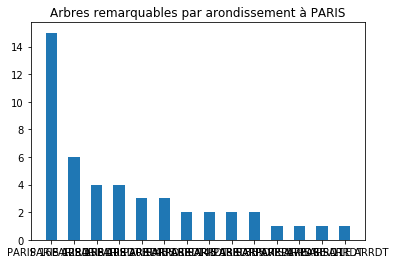

In [46]:
plt.bar(list(l2.keys()),list(l2), 0.5)
plt.title('Arbres remarquables par arondissement à PARIS')

# Comparaison entre les arbres dîtes remarquables et le reste

In [47]:
np.mean(ndt['HAUTEUR (m)'])/np.mean(dt['HAUTEUR (m)'])

1.479184715944751

In [48]:
np.mean(ndt['CIRCONFERENCEENCM'])/np.mean(dt['CIRCONFERENCEENCM'])

2.0916496828972466

In [49]:
len(ndt['ESPECE'].value_counts().keys())/len(dt['ESPECE'].value_counts().keys())
#40% des espèces remarquables

0.4090909090909091

In [59]:
len(ndt['DOMANIALITE'].value_counts().keys())/len(dt['DOMANIALITE'].value_counts().keys())
#33% des domaines publiques contiennent des arbres remarquables

0.3333333333333333

# importer les données des arrondissements

In [68]:
df = pd.read_csv('arrondissements.csv' , sep=';')
df.head()

,C_ARINSEE,L_AR,SURFACE,PERIMETRE,OBJECTID,LONGUEUR
0,75102,2ème Ardt,9.911537e+05,4554.104360,2,4553.938764
1,75103,3ème Ardt,1.170883e+06,4519.263648,3,4519.071982
2,75112,12ème Ardt,1.631478e+07,24089.666298,12,24088.038922
3,75101,1er Ardt,1.824613e+06,6054.936862,1,6054.680862
4,75104,4ème Ardt,1.600586e+06,5420.908434,4,5420.636779


In [72]:
condition = dt.ARRONDISSEMENT.str.contains('PARIS')
dt[condition].ARRONDISSEMENT.value_counts()
dt1=dt[condition]
        